## Linear Discriminant Analysis (LDA)
> Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

> **The general LDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).**

> So, in a nutshell, often the goal of an LDA is to project a feature space (d-dimensional) onto a smaller subspace k (where k ≤ d−1) while maintaining the class-discriminatory information. 

### A Summary of the LDA Approach
- Compute the d-dimensional mean vectors for the different classes from the dataset.
- Compute the scatter matrices (in-between-class and within-class scatter matrix).
- Compute the eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd) for the scatter matrices.
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a **k×d** dimensional matrix **W** (where every column represents an eigenvector).
- Use this **d*k** eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: **Y=X×W** (where **X** is a **n×d**-dimensional matrix representing the n samples, and **y** are the transformed **n×k**-dimensional samples in the new subspace).


### Suggested reading: [線代啟示錄 - LDA](https://ccjou.wordpress.com/2014/03/14/%E8%B2%BB%E9%9B%AA%E7%9A%84%E5%88%A4%E5%88%A5%E5%88%86%E6%9E%90%E8%88%87%E7%B7%9A%E6%80%A7%E5%88%A4%E5%88%A5%E5%88%86%E6%9E%90/)

In [2]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X, y = iris.data, iris.target
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
print(X.shape)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
new_X = lda.transform(X)
print(new_X.shape)

(150, 4)
(150, 2)


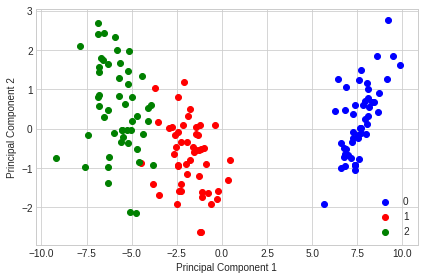

In [3]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(new_X[y==lab, 0],
                    new_X[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()